# Attention Architecture

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from src.encode_data import *
from src.midi_data import *
from src.data_sources import process_all
from src.midi_transform import *
from src.fastai_data import *
from src.msklm import *
from src.serve import *

ModuleNotFoundError: No module named 'src.encode_data'

In [4]:
data_path = Path('data')

# Location of your midi files
midi_path = data_path/'midi'
midi_path.mkdir(parents=True, exist_ok=True)

# Location of transformed midi to numpy dataset
numpy_path = data_path/'numpy'/'combined_tracks'
numpy_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'data_idxenc.pkl'

NameError: name 'Path' is not defined

## Single Stream Encoding

In [5]:
config = default_config(vocab); config

{'ctx_len': 150,
 'n_layers': 16,
 'n_heads': 8,
 'd_model': 512,
 'd_head': 64,
 'd_inner': 2048,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.1,
 'bias': False,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': True,
 'tie_weights': True,
 'out_bias': True,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mem_len': 512,
 'mask': True,
 'pad_idx': 1,
 'bos_idx': 0,
 'sep_idx': 8,
 'transpose_range': (0, 12),
 'note_range': (9, 137),
 'bs': 16,
 'bptt': 256,
 'vocab_size': 312}

## Fastai Learner

In [6]:
data = load_data(numpy_path, data_save_name)

In [7]:
saved_models = get_files(numpy_path/'models', recurse=True, extensions=['.pth']); saved_models

[PosixPath('data/numpy/combined_tracks/models/MusicTransformer.pth')]

In [8]:
load_path = saved_models[0]; load_path

PosixPath('data/numpy/combined_tracks/models/MusicTransformer.pth')

In [9]:
learn = load_music_learner(data, config.copy(), load_path)

## Prediction

In [22]:
data_dir = 'data/midi/examples/'

In [13]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files

[PosixPath('data/midi/examples/Levels - Avicii - Verse.mid'),
 PosixPath('data/midi/examples/Colors Of The Wind - Disney - Chorus.mid'),
 PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid'),
 PosixPath('data/midi/examples/La Bamba - Ritchie Valen - Chorus.mid'),
 PosixPath('data/midi/examples/I Want You Back - Jackson 5 - Intro.mid'),
 PosixPath('data/midi/examples/Locked Out Of Heaven - Bruno Mars - Chorus.mid'),
 PosixPath('data/midi/examples/Just Give Me A Reason - Pink - Chorus.mid'),
 PosixPath('data/midi/examples/All I Want For Christmas Is You - Mariah Carey - Pre-Chorus-And-Chorus.mid'),
 PosixPath('data/midi/examples/Fuer Elise - Ludwig Van Beethoven - Verse.mid'),
 PosixPath('data/midi/examples/Let It Go - Idina Menzel - Chorus.mid'),
 PosixPath('data/midi/examples/Call Me Maybe - Carly Rae Jepsen - Chorus.mid'),
 PosixPath('data/midi/examples/Scary Monsters And Nice Sprites - Skrillex - Pre-Chorus.mid'),
 PosixPath('data/midi/examples/A Thousand 

In [14]:
idx = 2
f = midi_files[idx]; f

PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid')

### Encode the song and trim to seed length

In [25]:
seed_len = 120

idxenc = midi2idxenc(f)
seed = idxenc[:seed_len]
xb = torch.tensor(seed)[None]
if torch.cuda.is_available(): xb = xb.cuda()

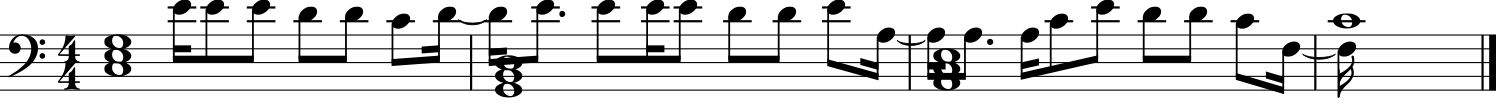

In [26]:
seed_stream = idxenc2stream(seed)
seed_stream.show()

In [27]:
seed_stream.show('midi')

In [28]:
out_s, seed_s = learn.predict_topk(xb, n_words=400, temperatures=(1.1,0.4), min_bars=12, top_k=24, top_p=0.7)

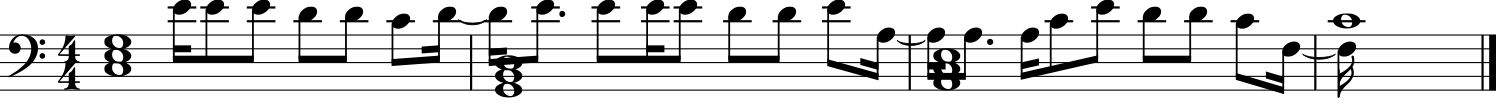

In [29]:
stream = idxenc2stream(seed_s)
stream.show()

### Listen to predictions

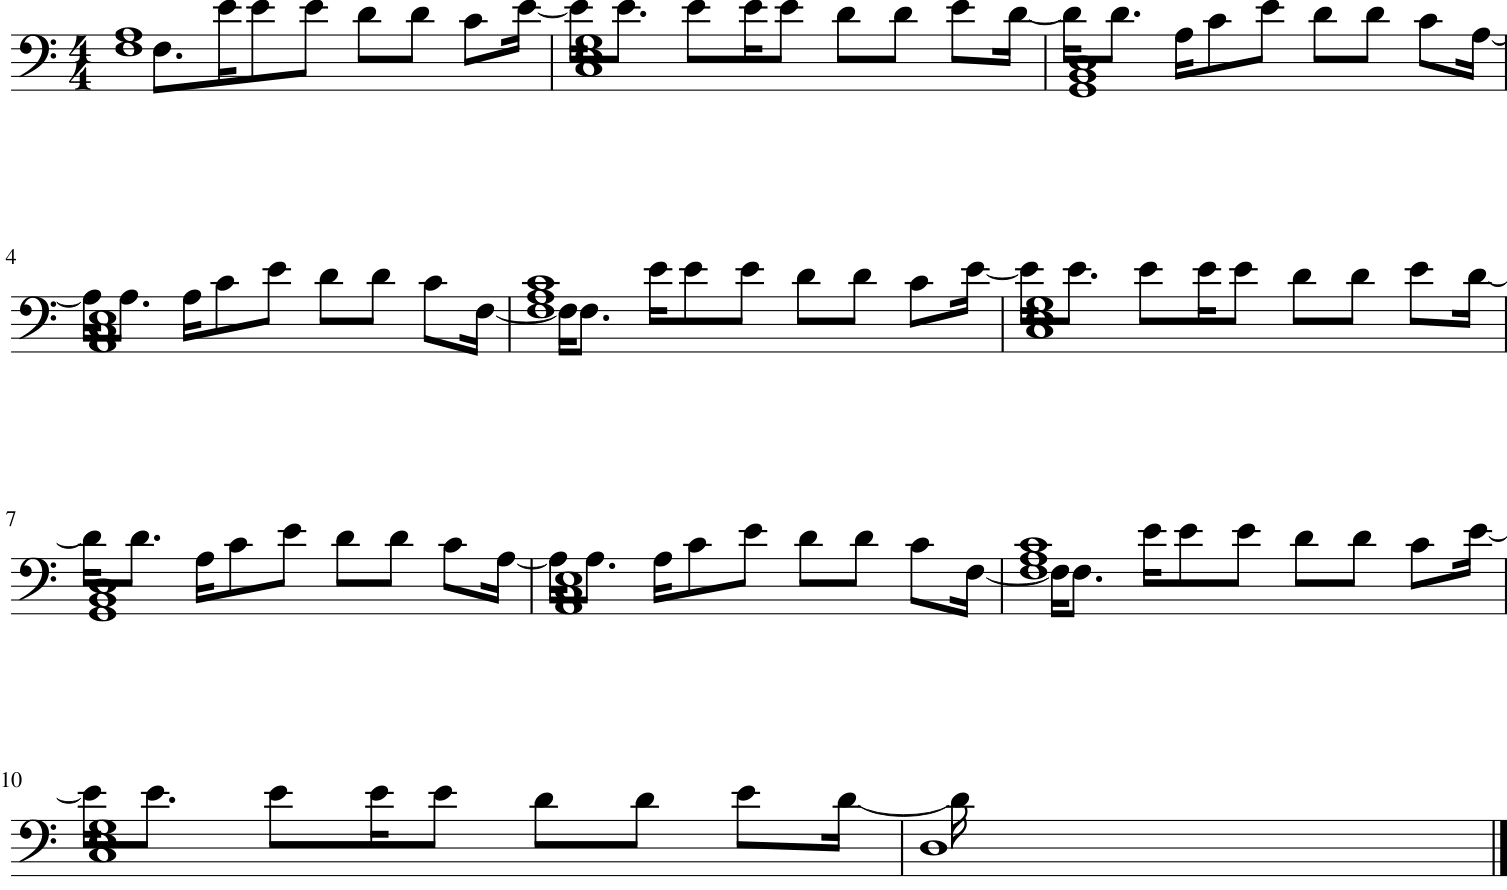

In [31]:
stream = idxenc2stream(out_s)
stream.show()

In [32]:
stream.show('midi')